# 0. Setting path and loading data

In [1]:
from pathlib import Path
import os


get_path = os.environ.get("UNI_PATH")
DATA_PATH = Path(get_path).resolve()
cityscapes = DATA_PATH / "Datasets/"

for dirpath, dirnames, filenames in os.walk(cityscapes):
    # 1. Convert the current string path to a Path object
    full_path = Path(dirpath)

    # 2. Strip the full parent path to get only the relative structure
    # This turns "/mnt/d/Safe/Datasets/Train/Images" into "Train/Images"
    relative_path = full_path.relative_to(cityscapes)

    print(f"   Location: {relative_path}")
    print(f"   Sub-folders: {dirnames}")
    print(f"   Files: {filenames}")
    print("-" * 20)

   Location: .
   Sub-folders: ['CityScapes5000']
   Files: []
--------------------
   Location: CityScapes5000
   Sub-folders: ['gtFine_trainvaltest', 'leftImg8bit_trainvaltest']
   Files: []
--------------------
   Location: CityScapes5000/gtFine_trainvaltest
   Sub-folders: ['gtFine']
   Files: ['license.txt', 'README']
--------------------
   Location: CityScapes5000/gtFine_trainvaltest/gtFine
   Sub-folders: ['test', 'train', 'val']
   Files: []
--------------------
   Location: CityScapes5000/gtFine_trainvaltest/gtFine/test
   Sub-folders: ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
   Files: []
--------------------
   Location: CityScapes5000/gtFine_trainvaltest/gtFine/test/berlin
   Sub-folders: []
   Files: ['berlin_000000_000019_gtFine_color.png', 'berlin_000000_000019_gtFine_instanceIds.png', 'berlin_000000_000019_gtFine_labelIds.png', 'berlin_000000_000019_gtFine_polygons.json', 'berlin_000001_000019_gtFine_color.png', 'berlin_000001_000019_gtFine_insta

# 1. Data exploration

In [ ]:
cityscapes_labels_train = cityscapes /"CityScapes5000" / "gtFine" / "train"
one_image = cityscapes_labels_train / "aachen" /"aachen_000000_000019_gtFine_labelIds.png"

from PIL import Image
import numpy as np

raw_mask = np.array(Image.open(one_image))
print(raw_mask)

unique_ids = np.unique(raw_mask)
print(unique_ids)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
[ 0  1  3  4  7  8 11 17 20 21 22 23 24 25 26 33]


## Visualizing labels

<class 'PIL.PngImagePlugin.PngImageFile'>


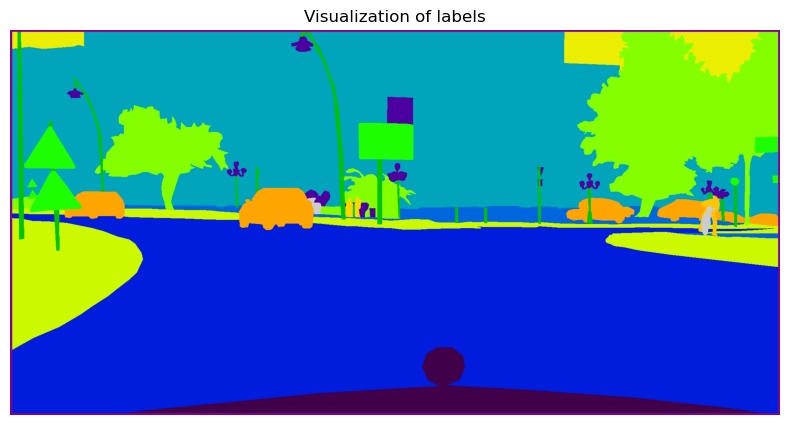

In [8]:
import matplotlib.pyplot as plt


first_image_labels = Image.open(one_image)
print(type(first_image_labels))

plt.figure(figsize=(10, 5))
plt.imshow(first_image_labels, cmap='nipy_spectral')
plt.title("Visualization of labels")
plt.axis("off")
plt.show()


## Visualize the original

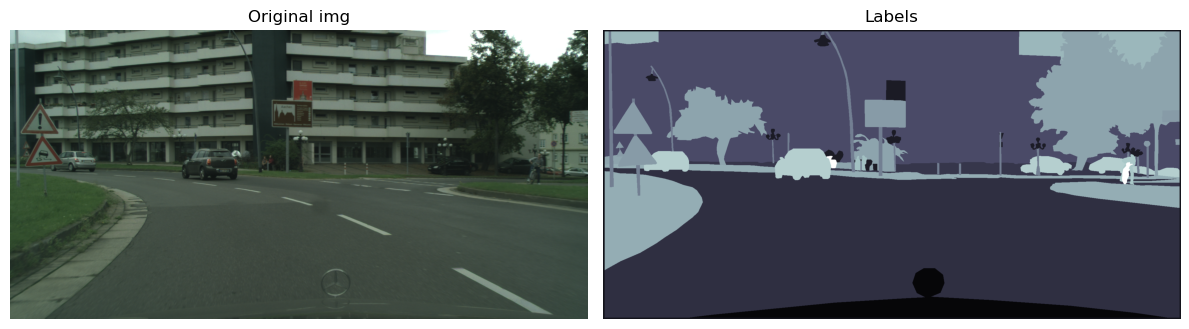

In [ ]:
first_image_path = cityscapes / "CityScapes5000" / "leftImg8bit"/ "train" / "aachen"/ "aachen_000000_000019_leftImg8bit.png"
first_image = Image.open(first_image_path)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(first_image)
ax1.set_title("Original img")
ax1.axis('off')

ax2.imshow(first_image_labels, cmap='bone')
ax2.set_title("Labels")
ax2.axis('off')

plt.tight_layout()
plt.show()

# 2. Preprocessing, normalization, labeling


# 3. Training - Test indices (if needed)

# 4. Dataset creation

In [19]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import Cityscapes


dataset = Cityscapes(cityscapes /"CityScapes5000" , split='train', mode='fine',
                     target_type='semantic')

img, smnt = dataset[0]

# 5. Architecture

# 6. Training